# Section 04: **Best Practices**

### **`01-Bar plots: dynamite plots`**

-   Using `mtcars,`, plot `wt` versus `fcyl`.

-   Add a bar summary stat, aggregating the `wt`s by their mean, filling the bars in a skyblue color.

-   Add an errorbar summary stat, aggregating the `wt`s by `mean_sdl`.

In [1]:
library(tidyverse)
mtcars <- read.csv("..\\00_Datasets\\mtcars_v2.csv", header=TRUE)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Warning message:
"`fun.y` is deprecated. Use `fun` instead."
Warning message:
"Ignoring unknown parameters: match.fun.data"
No summary function supplied, defaulting to `mean_se()`



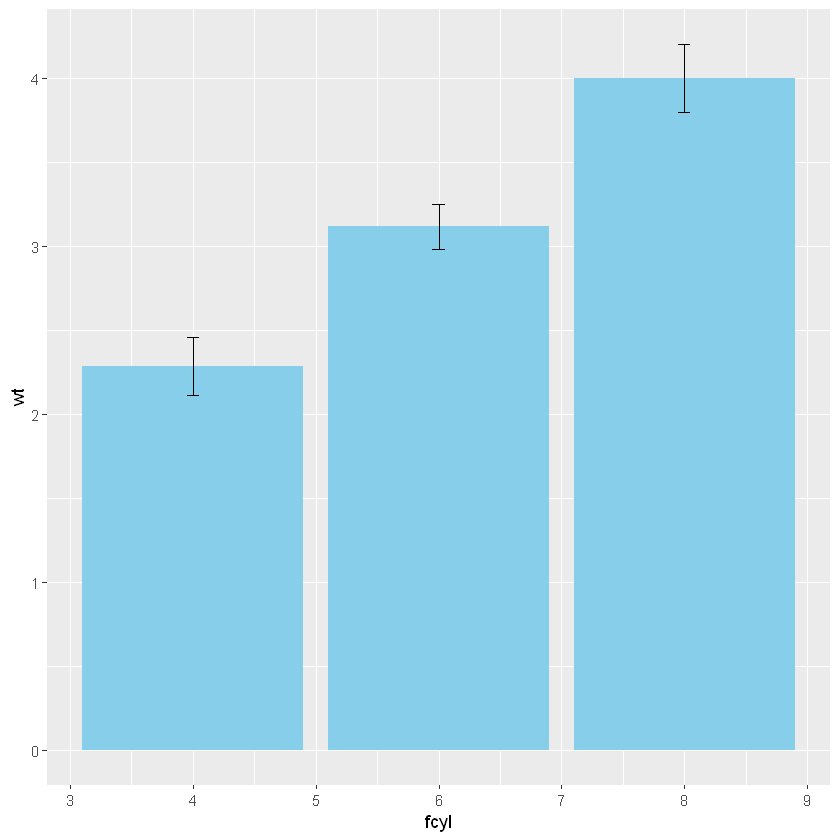

In [2]:
# Plot wt vs. fcyl
ggplot(mtcars, aes(x = fcyl, y = wt)) +
  # Add a bar summary stat of means, colored skyblue
  stat_summary(fun.y = mean, geom = "bar", fill = "skyblue") +
  # Add an errorbar summary stat std deviation limits
  stat_summary(match.fun.data = mean_sdl, fun.args = list(mult = 1), geom = "errorbar", width = 0.1)

### **`02-Bar plots: position dodging`**

-   Add two more aesthetics so the bars are `color`ed and `fill`ed by `fam`.

Warning message:
"`fun.y` is deprecated. Use `fun` instead."
Warning message:
"Ignoring unknown parameters: match.fun.data"
No summary function supplied, defaulting to `mean_se()`



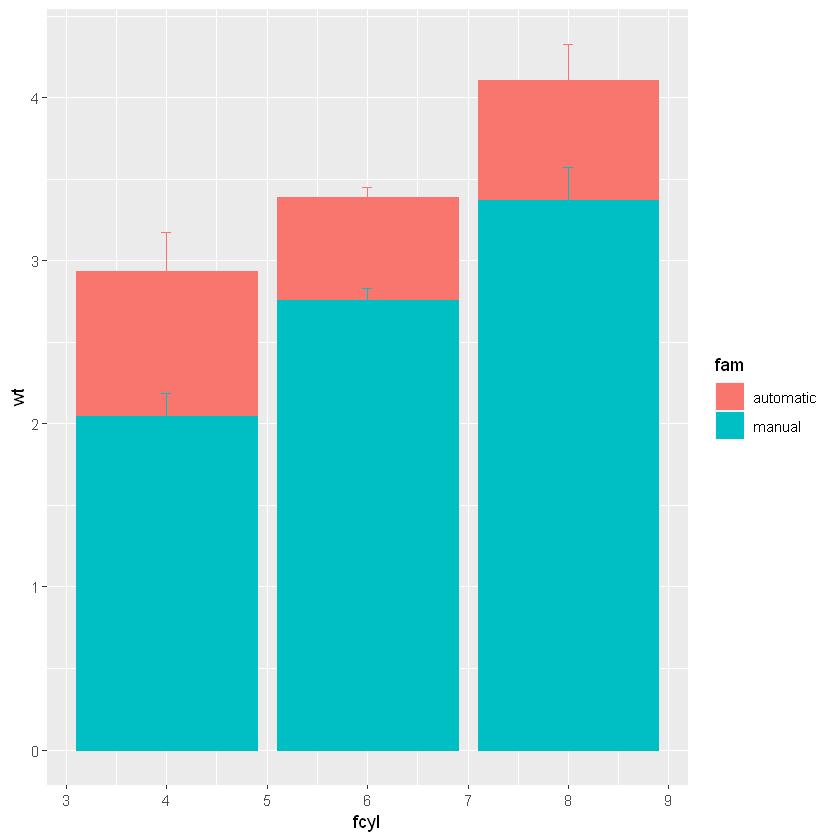

In [3]:
# Update the aesthetics to color and fill by fam
ggplot(mtcars, aes(x = fcyl, y = wt, color = fam, fill = fam)) +
  stat_summary(fun.y = mean, geom = "bar") +
  stat_summary(match.fun.data = mean_sdl, fun.args = list(mult = 1), geom = "errorbar", width = 0.1)

The stacked bars are tricky to interpret. Make them transparent and side-by-side.

-   Make the bar summary statistic transparent by setting `alpha` to `0.5`.

-   For each of the summary statistics, set the bars' position to `"dodge"`.


Warning message:
"`fun.y` is deprecated. Use `fun` instead."
Warning message:
"Ignoring unknown parameters: match.fun.data"
No summary function supplied, defaulting to `mean_se()`



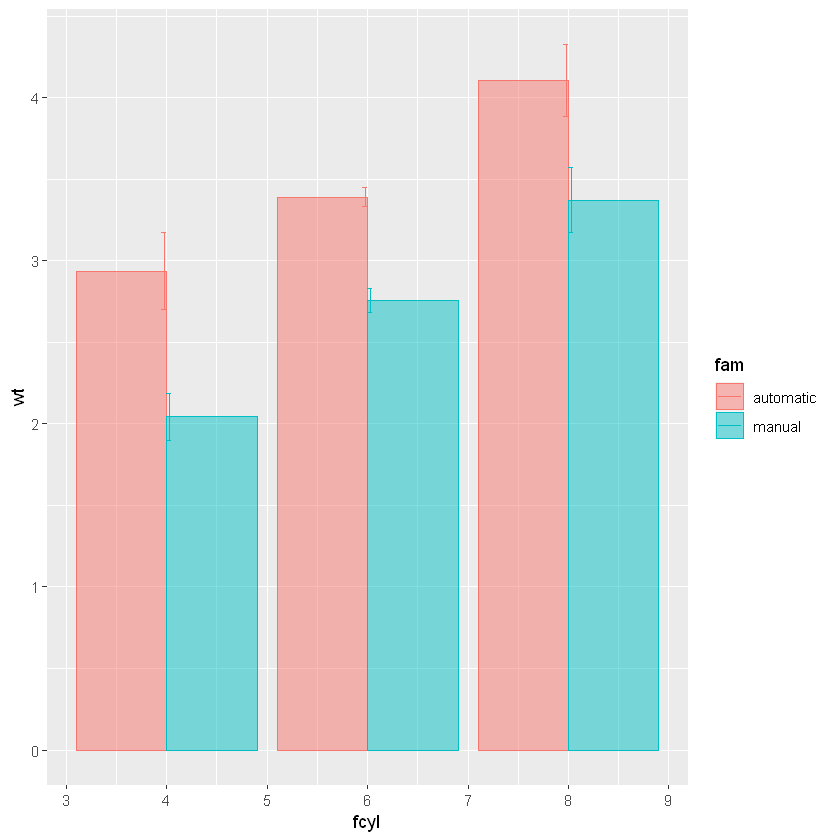

In [4]:
# Set alpha for the first and set position for each stat summary function
ggplot(mtcars, aes(x = fcyl, y = wt, color = fam, fill = fam)) +
  stat_summary(fun.y = mean, geom = "bar", alpha = 0.5, position  = "dodge") +
  stat_summary(match.fun.data = mean_sdl, fun.args = list(mult = 1), geom = "errorbar", position  = "dodge", width = 0.1)

The error bars are incorrectly positioned. Use a position object.

-   Define a dodge position object with width `0.9`, assigned to `posn_d`.

-   For each of the summary statistics, set the bars' position to `posn_d`.

Warning message:
"`fun.y` is deprecated. Use `fun` instead."
Warning message:
"Ignoring unknown parameters: match.fun.data"
No summary function supplied, defaulting to `mean_se()`



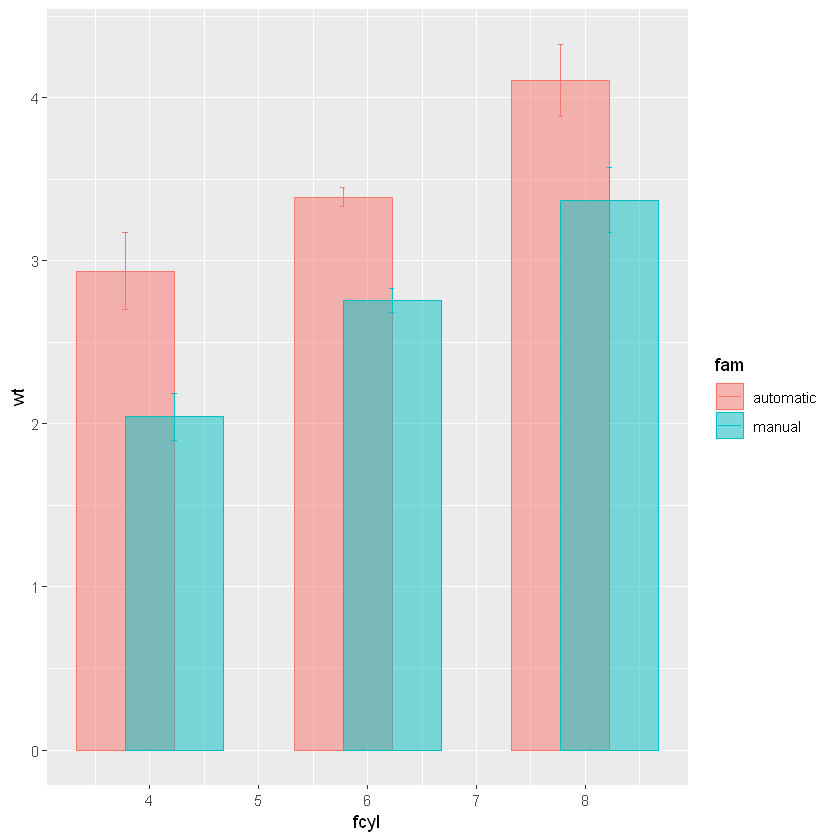

In [5]:
# Define a dodge position object with width 0.9
posn_d <- position_dodge(width = 0.9)

# For each summary stat, update the position to posn_d
ggplot(mtcars, aes(x = fcyl, y = wt, color = fam, fill = fam)) +
  stat_summary(fun.y = mean, geom = "bar", position = posn_d, alpha = 0.5) +
  stat_summary(match.fun.data = mean_sdl, fun.args = list(mult = 1), width = 0.1, position = posn_d, geom = "errorbar")

### **`03-Bar plots: Using aggregated data`**

In [6]:
# Definition of vectors
cyl  <- c(4, 6, 8)
mean_wt <- c(2.29, 3.12, 4.00)
sd_wt <- c(0.570, 0.356, 0.759)
n_wt <- c(11, 7, 14)
prop <- c(0.344, 0.219, 0.438)

# Create a data frame from the vectors
mtcars_by_cyl <- data.frame(cyl, mean_wt, sd_wt, n_wt, prop)
mtcars_by_cyl

cyl,mean_wt,sd_wt,n_wt,prop
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,2.29,0.570,11,0.344
6,3.12,0.356,7,0.219
8,4.00,0.759,14,0.438


Draw a bar plot with `geom_bar()`.

-   Using `mtcars_by_cyl`, plot `mean_wt` versus `cyl`.

-   Add a bar layer, with `stat` set to `"identity"` an fill-color `"skyblue"`.

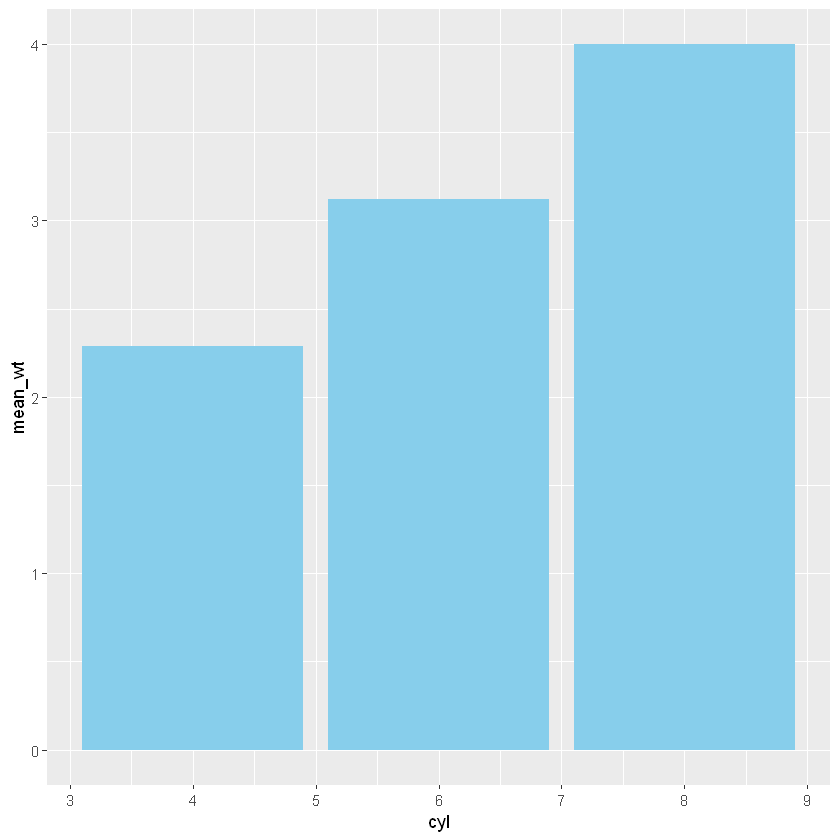

In [7]:
# Using mtcars_cyl, plot mean_wt vs. cyl
ggplot(mtcars_by_cyl, aes(x = cyl, y = mean_wt)) +
  # Add a bar layer with identity stat, filled skyblue
  geom_bar(stat = "identity", fill = "skyblue")

Draw the same plot with `geom_col()`.

-   Replace `geom_bar()` with `geom_col()`.

-   Remove the `stat` argument.

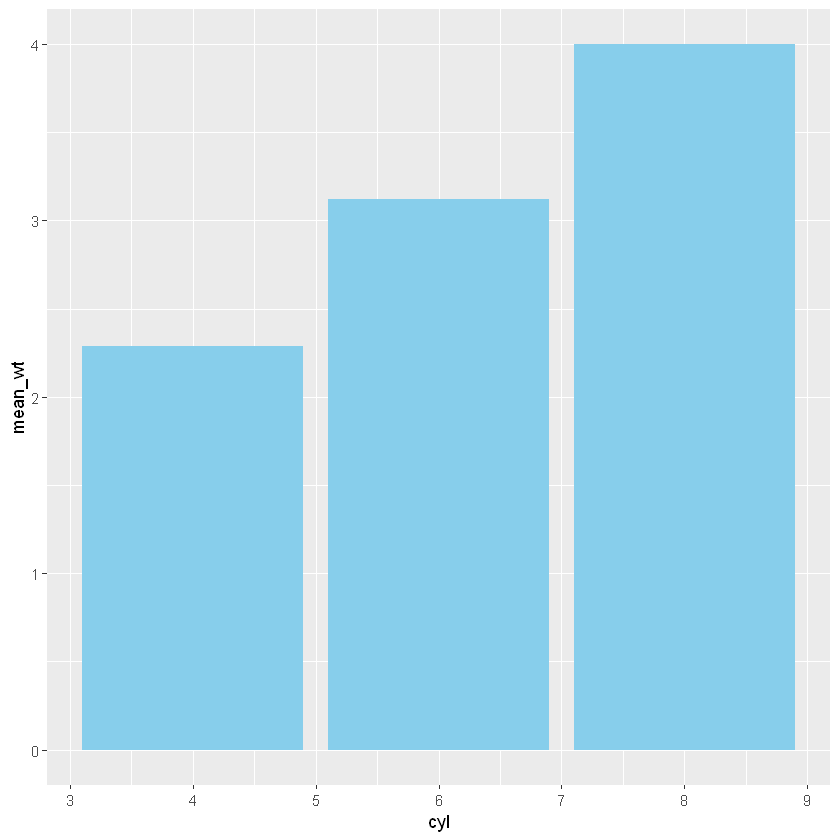

In [8]:
ggplot(mtcars_by_cyl, aes(x = cyl, y = mean_wt)) +
  # Swap geom_bar() for geom_col()
  geom_col(fill = "skyblue")

Change the bar widths to reflect the proportion of data they contain.

-   Add a `width` aesthetic to `geom_col()`, set to `prop`. (*Ignore the warning from ggplot2.*)

Warning message:
"Ignoring unknown aesthetics: width"


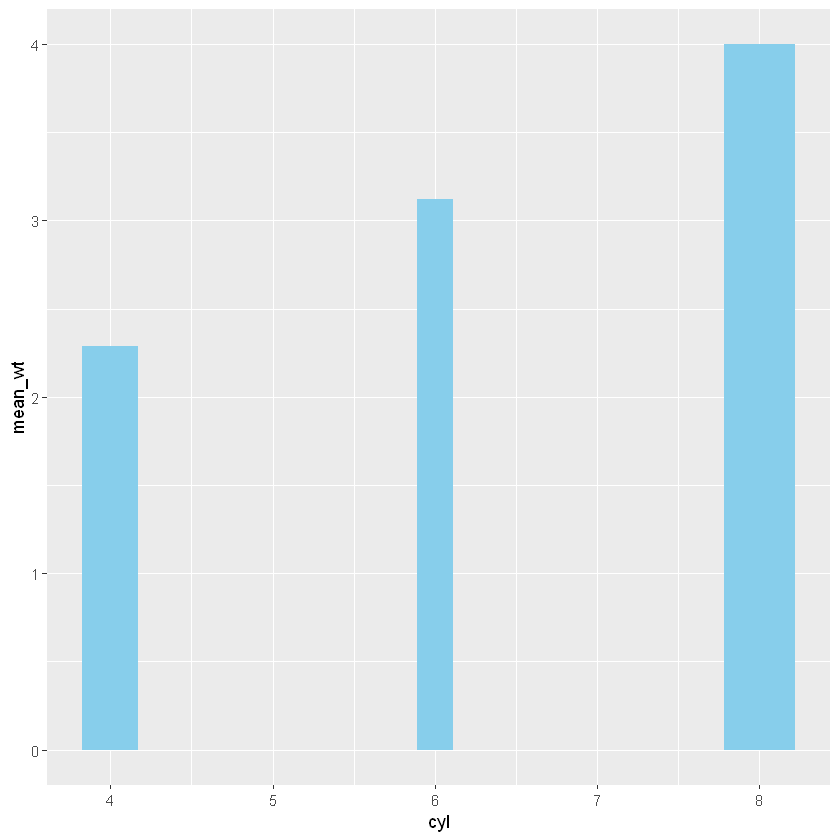

In [9]:
ggplot(mtcars_by_cyl, aes(x = cyl, y = mean_wt)) +
  # Set the width aesthetic to prop
  geom_col(fill = "skyblue", aes(width = prop))

-   Add `geom_errorbar()`.

-   Set the `ymin` aesthetic to `mean_wt` minus `sd_wt`. Set the `ymax` aesthetic to the mean weight plus the standard deviation of the weight.

-   Set the width to `0.1`.

Warning message:
"Ignoring unknown aesthetics: width"


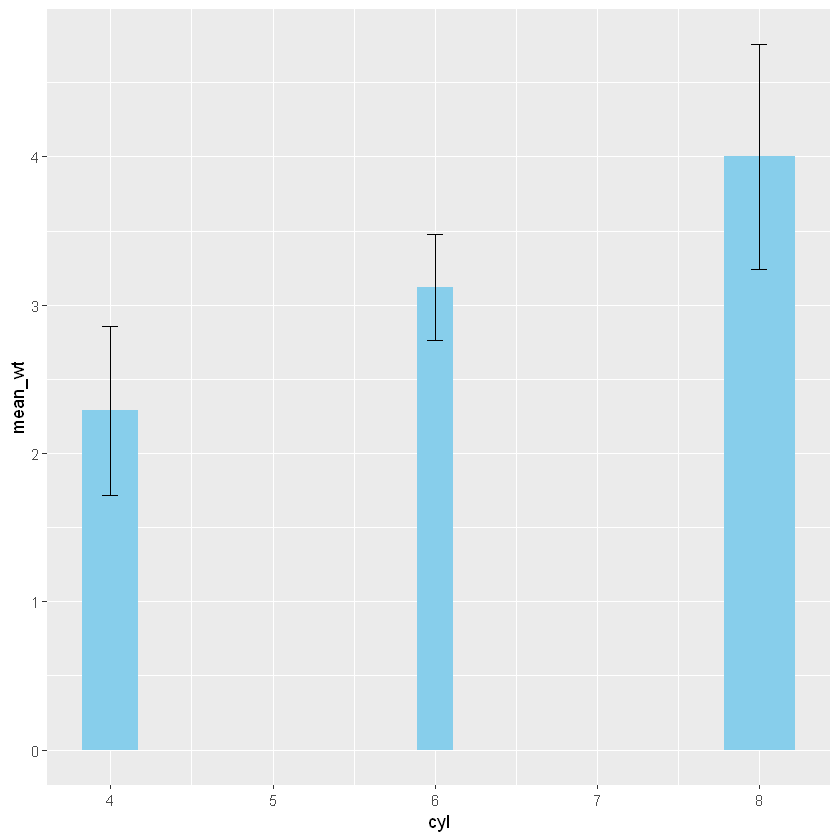

In [10]:
ggplot(mtcars_by_cyl, aes(x = cyl, y = mean_wt)) +
  geom_col(aes(width = prop), fill = "skyblue") +
  # Add an errorbar layer
  geom_errorbar(
    # ... at mean weight plus or minus 1 std dev
    aes(ymin = mean_wt - sd_wt, ymax = mean_wt + sd_wt),
    # with width 0.1
    width = 0.1
  )

### **`04-Heat maps`**

Since heat maps encode *color* on a continuous scale, they are difficult to accurately *decode*, a topic we discussed in the first course. Hence, heat maps are most useful if you have a small number of boxes and/or a clear pattern that allows you to overcome decoding difficulties.

To produce them, map two categorical variables onto the `x` and `y` aesthetics, along with a continuous variable onto `fill`. The `geom_tile()` layer adds the boxes.

We'll produce the heat map we saw in the video (in the viewer) with the built-in `barley` dataset. The `barley` dataset is in the `lattice` package and has already been loaded for you. Use `str()` to explore the structure.


In [11]:
# install.packages("lattice")
library(lattice)

-   Using `barley`, plot `variety` versus `year`, filled by `yield`.
-   Add a `geom_tile()` layer.

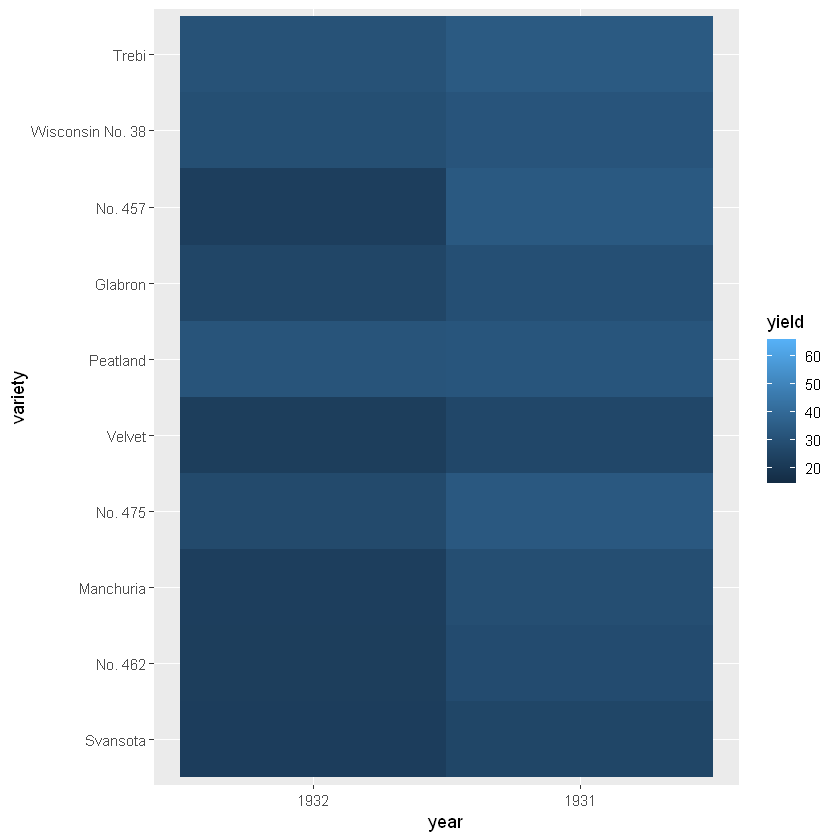

In [12]:
# Using barley, plot variety vs. year, filled by yield
ggplot(barley, aes(year, variety , fill = yield)) +
  # Add a tile geom
  geom_tile()

-   Add a `facet_wrap()` function with facets as `vars(site)` and `ncol = 1`. *Strip names will be above the panels, not to the side (as with `facet_grid()`).*

-   Give the heat maps a 2-color palette using `scale_fill_gradient()`. Set `low` and `high` to `"white"` and `"red"`, respectively.

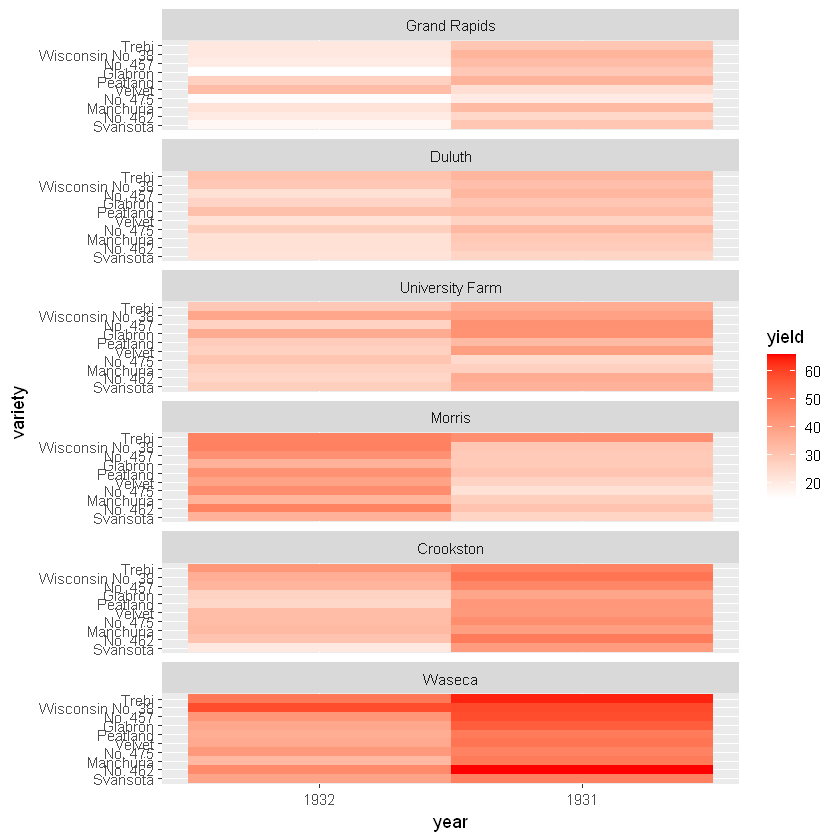

In [13]:
# Previously defined
ggplot(barley, aes(x = year, y = variety, fill = yield)) +
  geom_tile() +
  # Facet, wrapping by site, with 1 column
  facet_wrap(facets = vars(site), ncol = 1) +
  # Add a fill scale using an 2-color gradient
  scale_fill_gradient(low = "white", high = "red")

A color palette of 9 reds, made with `brewer.pal()`, is provided as `red_brewer_palette`.

-   Update the fill scale to use an *n*-color gradient with `scale_fill_gradientn()` (note the `n`). Set the scale `colors` to the red brewer palette.


In [14]:
#install.packages("RColorBrewer")
library("RColorBrewer")

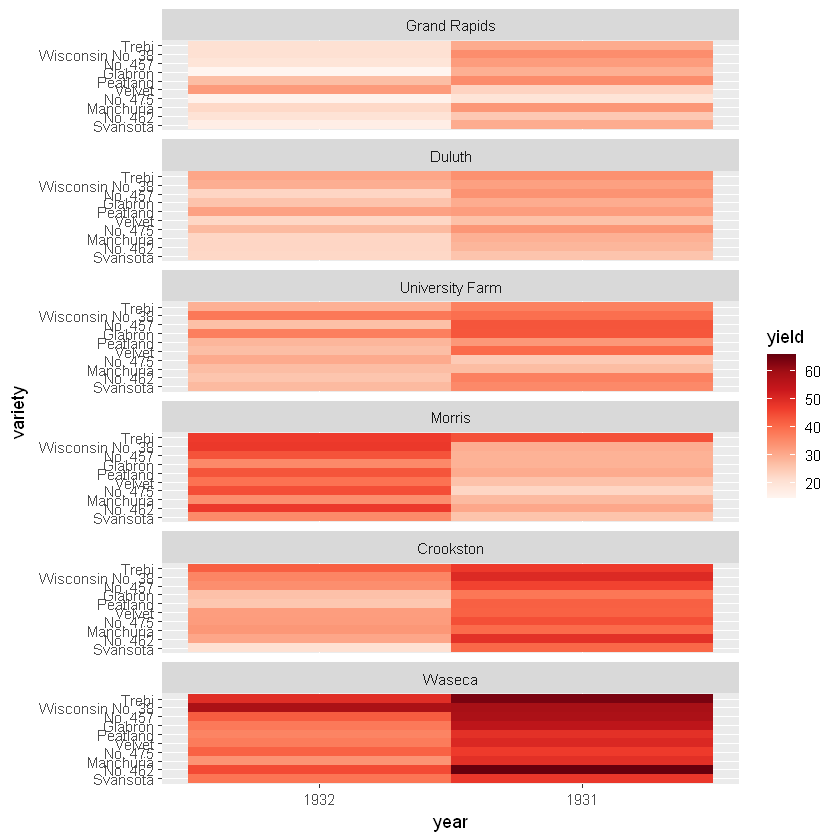

In [15]:
# A palette of 9 reds
red_brewer_palette <- brewer.pal(9, "Reds")

# Update the plot
ggplot(barley, aes(x = year, y = variety, fill = yield)) +
  geom_tile() + 
  facet_wrap(facets = vars(site), ncol = 1) +
  # Update scale to use n-colors from red_brewer_palette
  scale_fill_gradientn(colors = red_brewer_palette) 

### **`05-Heat map alternatives`**

There are several alternatives to heat maps. The best choice really depends on the data and the story you want to tell with this data. If there is a time component, the most obvious choice is a line plot.

-   Using `barley`, plot `yield` versus `year`, colored and grouped by `variety`.

-   Add a line layer.

-   Facet, wrapping by `site`, with 1 row.

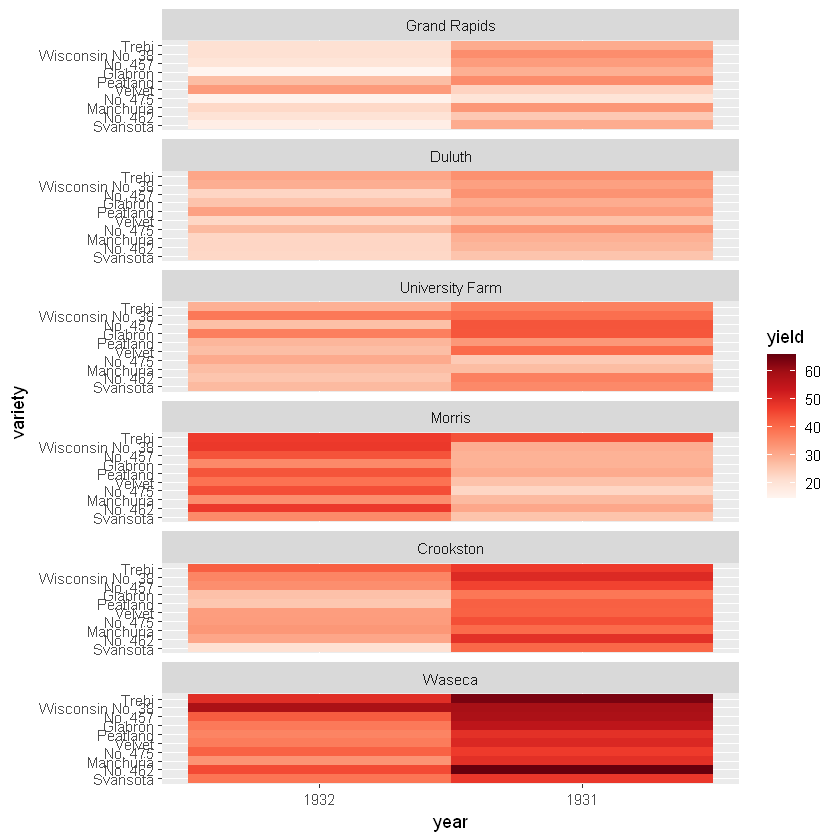

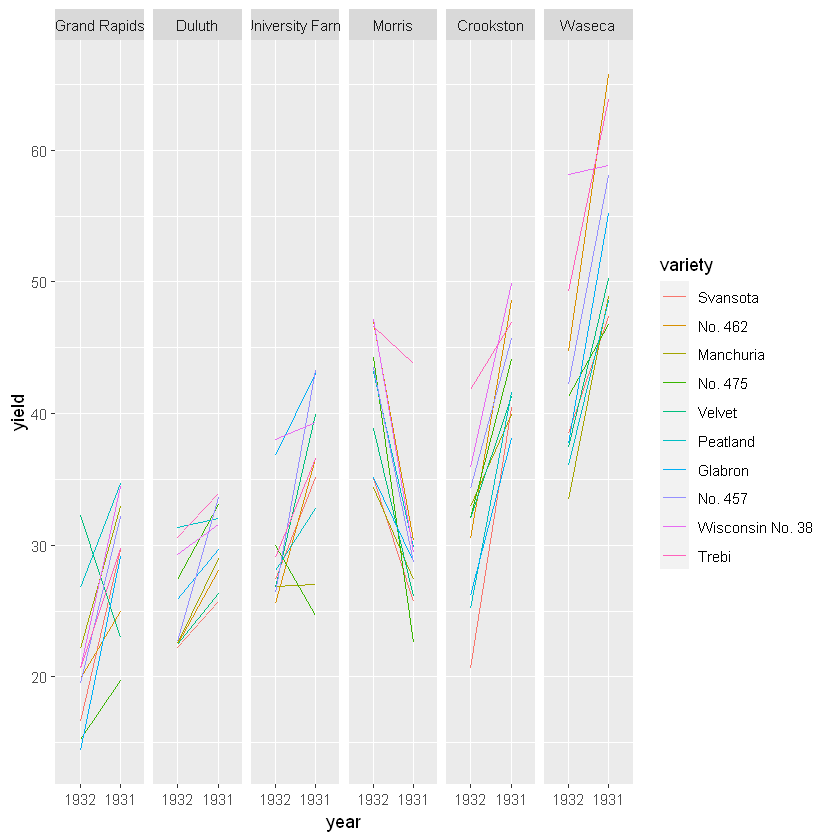

In [16]:
# The heat map we want to replace
# Don't remove, it's here to help you!
ggplot(barley, aes(x = year, y = variety, fill = yield)) +
  geom_tile() +
  facet_wrap( ~ site, ncol = 1) +
  scale_fill_gradientn(colors = brewer.pal(9, "Reds"))

# Using barley, plot yield vs. year, colored and grouped by variety
ggplot(barley, aes(x = year, y = yield, color = variety, group = variety)) +
  # Add a line layer
  geom_line() +
  # Facet, wrapping by site, with 1 row
  facet_wrap( ~ site, nrow = 1)

Display only means and ribbons for spread.

-   Map `site` onto `color`, `group` and `fill`.

-   Add a `stat_summary()` layer. set `fun.y = mean`, and `geom = "line"`.

-   In the second `stat_summary()`, set `geom = "ribbon"`, `color = NA` and `alpha = 0.1`.

Warning message:
"`fun.y` is deprecated. Use `fun` instead."
Warning message:
"Computation failed in `stat_summary()`:
"


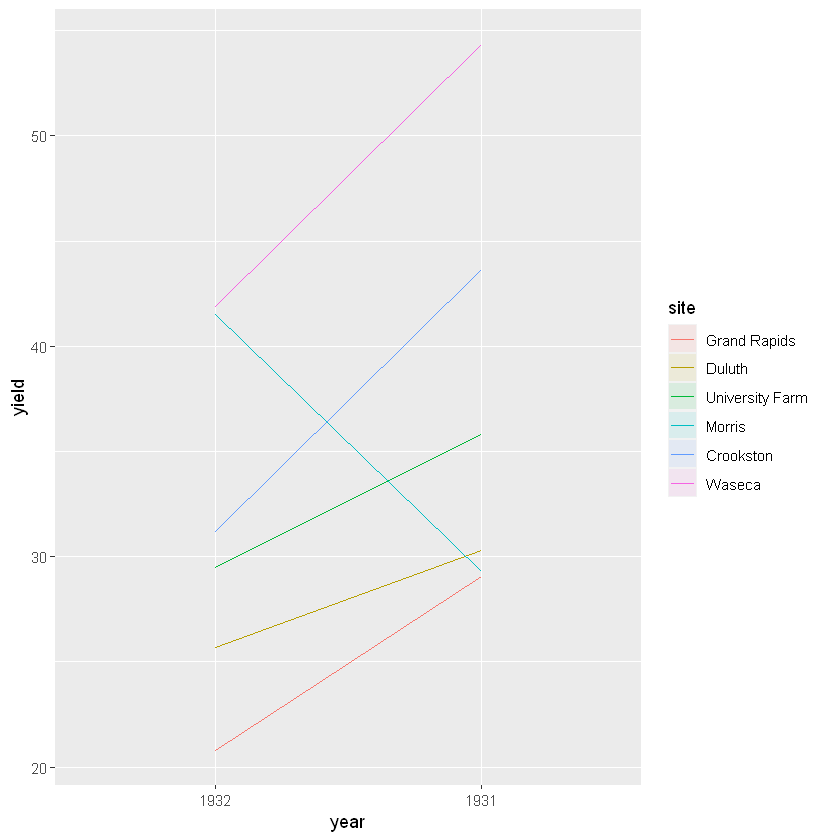

In [17]:
# Using barely, plot yield vs. year, colored, grouped, and filled by site
ggplot(barley, aes(x = year, y = yield, color = site, group = site, fill = site)) +
  # Add a line summary stat aggregated by mean
  stat_summary(fun.y = mean, geom = "line") +
  # Add a ribbon summary stat with 10% opacity, no color
  stat_summary(fun.data = mean_sdl, fun.args = list(mult = 1), geom = "ribbon", alpha = 0.1, color = NA)

### **`06-Typical problems`**

When you first encounter a data visualization, either from yourself or a colleague, you always want to critically ask if it's obscuring the data in any way.

Let's take a look at the steps we could take to produce and improve the plot in the view.

The data comes from an experiment where the effect of two different types of vitamin C sources, orange juice or ascorbic acid, were tested on the growth of the odontoblasts (cells responsible for tooth growth) in 60 guinea pigs.

The data is stored in the `TG` data frame, which contains three variables: `dose`, `len`, and `supp`.

The first plot contains purposely illegible labels. It's a common problem that can occur when resizing plots. There is also too much non-data ink.

-   Change `theme_gray(3)` to `theme_classic()`.


In [18]:
TG <- read.csv("..\\00_Datasets\\TG.csv", header=TRUE)

Warning message:
"Ignoring unknown parameters: match.fun.data"
No summary function supplied, defaulting to `mean_se()`

Warning message:
"Ignoring unknown parameters: match.fun.data"
No summary function supplied, defaulting to `mean_se()`



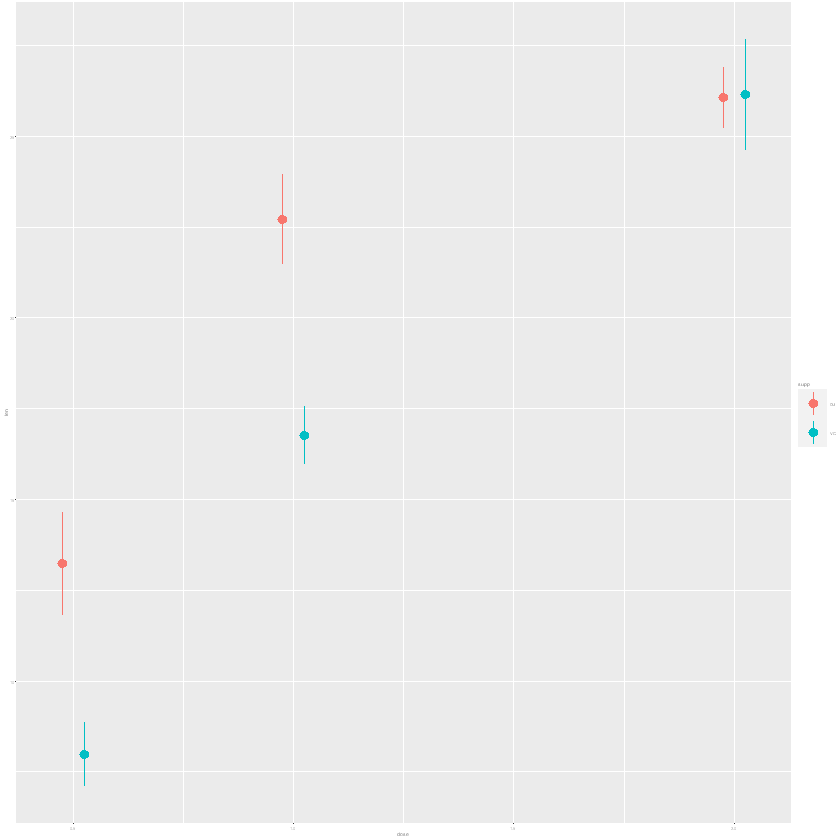

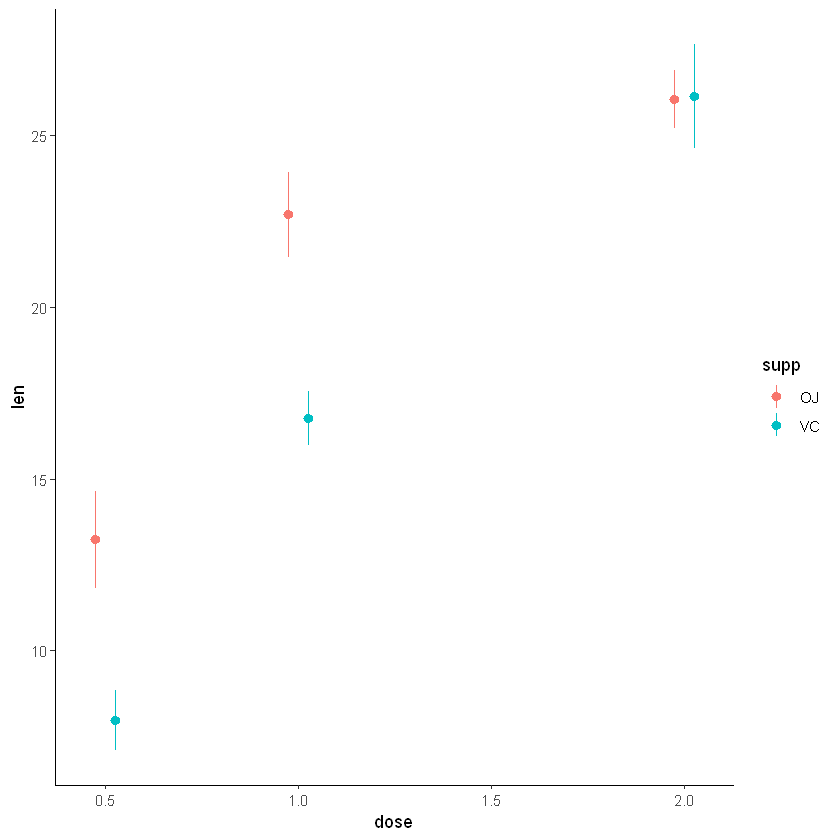

In [19]:
# Initial plot
growth_by_dose <- ggplot(TG, aes(dose, len, color = supp)) +
  stat_summary(match.fun.data = mean_sdl,
               fun.args = list(mult = 1),
               position = position_dodge(0.1)) +
  theme_gray(3)

# View plot
growth_by_dose



# Initial plot
growth_by_dose <- ggplot(TG, aes(dose, len, color = supp)) +
  stat_summary(match.fun.data = mean_sdl,
               fun.args = list(mult = 1),
               position = position_dodge(0.1)) +
  theme_classic()

# View plot
growth_by_dose

Our previous plot still has a major problem, `dose` is stored as a `factor` variable. That's why the spacing is off between the levels.

-   Use `as.character()` wrapped in `as.numeric()` to convert the factor variable to real (continuous) numbers.

Warning message:
"Ignoring unknown parameters: match.fun.data"
No summary function supplied, defaulting to `mean_se()`



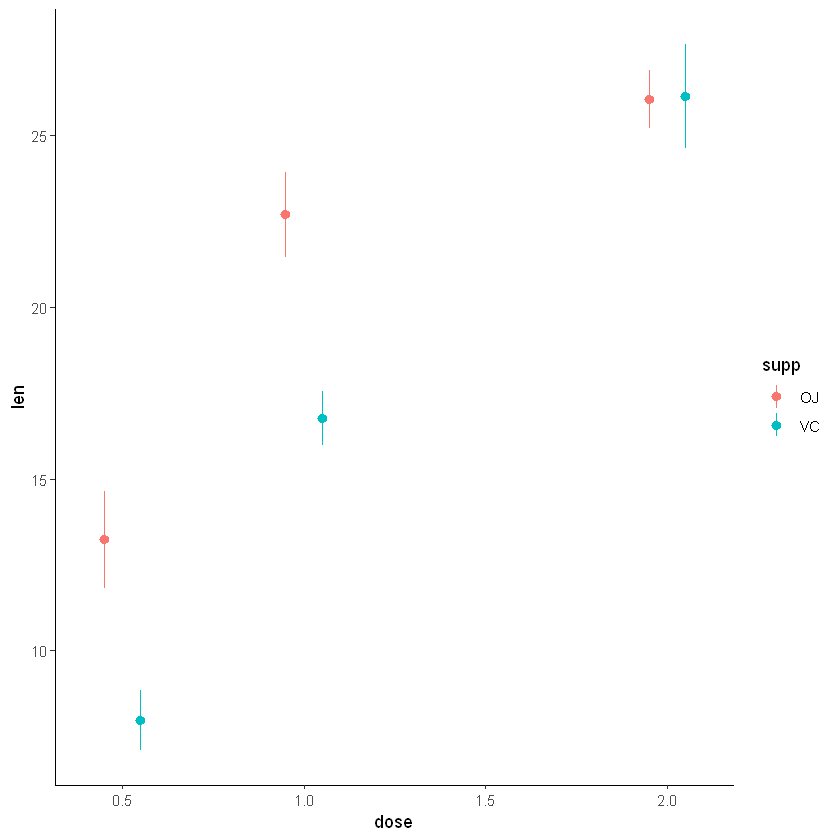

In [20]:
# Change type
TG$dose <- as.numeric(as.character(TG$dose))

# Plot
growth_by_dose <- ggplot(TG, aes(dose, len, color = supp)) +
  stat_summary(match.fun.data = mean_sdl,
               fun.args = list(mult = 1),
               position = position_dodge(0.2)) +
  theme_classic()

# View plot
growth_by_dose

Use the appropriate geometry for the data:

-   In the new `stat_summary()` function, set `fun.y` to to calculate the `mean` and the `geom` to a `"line"` to connect the points at their mean values.

Warning message:
"Ignoring unknown parameters: match.fun.data"
Warning message:
"`fun.y` is deprecated. Use `fun` instead."
No summary function supplied, defaulting to `mean_se()`



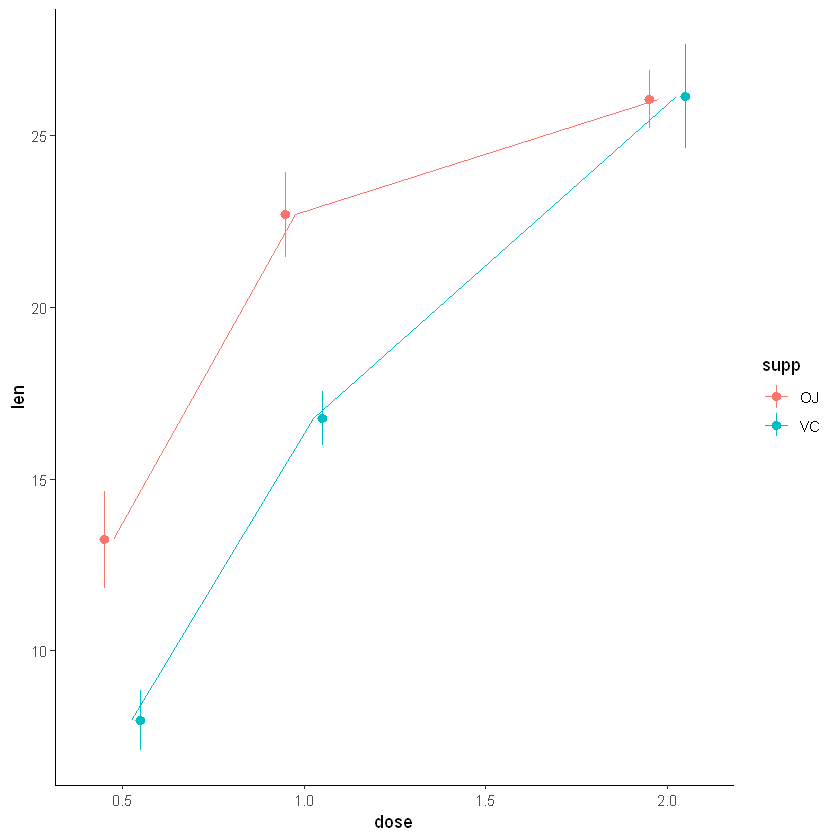

In [21]:
TG$dose <- as.numeric(as.character(TG$dose))

# Plot
growth_by_dose <- ggplot(TG, aes(dose, len, color = supp)) +
  stat_summary(match.fun.data = mean_sdl,
               fun.args = list(mult = 1),
               position = position_dodge(0.2)) +
  # Use the right geometry
  stat_summary(fun.y = mean,
               geom = "line",
               position = position_dodge(0.1)) +
  theme_classic()

# View plot
growth_by_dose


Make sure the labels are informative:

-   Add the units `"(mg/day)"` and `"(mean, standard deviation)"` to the x and y labels, respectively.

-   Use the `"Set1"` palette.

-   Set the legend labels to `"Orange juice"` and `"Ascorbic acid"`.

Warning message:
"Ignoring unknown parameters: match.fun.data"
Warning message:
"`fun.y` is deprecated. Use `fun` instead."
No summary function supplied, defaulting to `mean_se()`



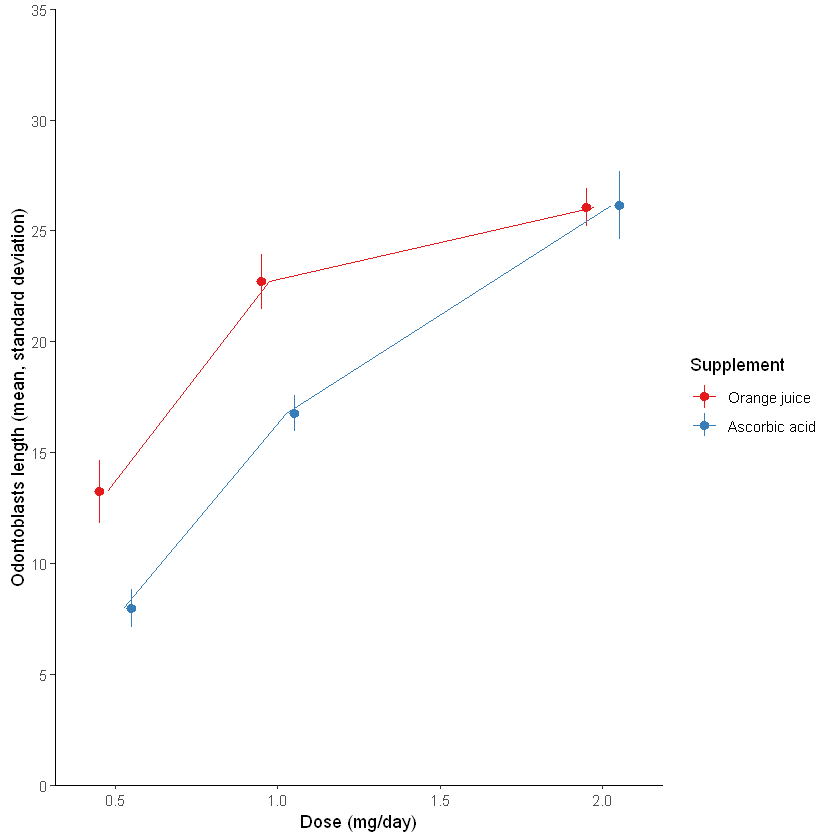

In [22]:
# Change type
TG$dose <- as.numeric(as.character(TG$dose))

# Plot
growth_by_dose <- ggplot(TG, aes(dose, len, color = supp)) +
  stat_summary(match.fun.data = mean_sdl,
               fun.args = list(mult = 1),
               position = position_dodge(0.2)) +
  stat_summary(fun.y = mean,
               geom = "line",
               position = position_dodge(0.1)) +
  theme_classic() +
  # Adjust labels and colors:
  labs(x = "Dose (mg/day)", y = "Odontoblasts length (mean, standard deviation)", color = "Supplement") +
  scale_color_brewer(palette = "Set1", labels = c("Orange juice", "Ascorbic acid")) +
  scale_y_continuous(limits = c(0,35), breaks = seq(0, 35, 5), expand = c(0,0))

# View plot
growth_by_dose

### **`The End`**